<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Normal Behavior Modeling (NBM) Example </center></h1>

# Prior to getting started:

First, 
<br>if you have just received a new api key from support, you will need to register your key and create a new user (see Register user cell)

Second, in the Environment Variables cell: 
1. Set your username and password to ensure that you're able to log in successfully
2. Set the path to the location of your datasets if you are using your own data.  The path is set for the examples.

Here are a few things to be mindful of:
1. For every run, check the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can do better by exploring a larger search space, use the resume function.

## Set Darwin SDK

In [27]:
from amb_sdk.sdk import DarwinSdk
ds = DarwinSdk()
ds.set_url('https://amb-trial-api.sparkcognition.com/v1/')

(True, 'https://amb-trial-api.sparkcognition.com/v1/')

## Register user (if needed, read above)

In [ ]:
# Use only if you have a new api-key and 
# no registered users - fill in the appropriate fields then execute

#Enter your support provided api key and api key password below to register/create new users
api_key = ''
api_key_pw = ''
status, msg = ds.auth_login(api_key_pw, api_key)
if not status:
    print(msg)

#Create a new user
status, msg = ds.auth_register_user('username', 'password','email@emailaddress.com')
if not status:
    print(msg)

## Environment Variables

In [13]:
#Set your user id and password accordingly
USER="[your Darwin user id]"
PW="[your Darwin password]"

# Set path to datasets - The default below assumes Jupyter was started from amb-sdk/examples/Enterprise/
# Modify accordingly if you wish to use your own data
PATH_TO_DATASET = '../../sets/'
TRAIN_DATASET = 'wind_turbine.csv'

# A timestamp is used to create a unique name in the event you execute the workflow multiple times or with 
# different datasets.  File names must be unique in Darwin.
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())

## Import necessary libraries

In [14]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import r2_score

# User Login

In [15]:
status, msg = ds.auth_login_user(USER,PW)
if not status:
    print(msg)

# Data Upload

**Read dataset and view a file snippet**
<br>After setting up the dataset path, the next step is to upload the dataset from your local device to the server.

In [16]:
# Preview dataset
df = pd.read_csv(os.path.join(PATH_TO_DATASET, TRAIN_DATASET))
df.head()

,timestamp,yaw_direction,ctrl_top_temp,vcn,transformer_a_tmp,power,gen_phc_temp,freq,gen_bearing_temp,gen_slip_temp,...,wind_speed,hydro_temp,gbx_bearing_temp,blade_angle,ambient_temp,ica,set_power,gen_phb_temp,pex,ctrl_hub_temp
0,9/1/14 0:10,274.7,26.0,399.5,75.0,1782.8,86.0,59.99,57.0,999.0,...,12.9,47.0,66.0,4.2,20.0,1510.6,1800.0,86.0,1773.0,27.0
1,9/1/14 0:20,269.9,26.0,402.2,70.0,1527.1,86.0,59.99,58.0,999.0,...,11.2,47.0,66.0,-1.3,19.0,1278.5,1800.0,86.0,1446.0,27.0
2,9/1/14 0:30,271.8,26.0,400.6,66.0,1664.7,85.0,59.99,58.0,999.0,...,12.1,47.0,66.0,1.9,20.0,1404.8,1800.0,85.0,1644.0,27.0
3,9/1/14 0:40,278.7,27.0,402.8,66.0,1570.2,87.0,59.99,59.0,999.0,...,11.4,47.0,66.0,0.2,21.0,1315.9,1800.0,87.0,1558.0,27.0
4,9/1/14 0:50,289.3,27.0,404.4,63.0,1242.5,82.0,59.99,60.0,999.0,...,10.4,47.0,66.0,-1.9,22.0,1029.9,1800.0,82.0,1244.0,27.0


**Upload dataset to Darwin**

In [ ]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, TRAIN_DATASET))
print(status)
print(dataset)

if not status:
    print(dataset)

# Create and Train Model 

We will now build a model that will learn the normal behavior of an asset based on a failure date.<br> The failure date in our example dataset is 8/24/15. <br> You will have to specify a different failure date for your custom dataset. <br> You can also specify a recovery_dates when the asset comes back online.


In [18]:
model = "model" + "-" + ts
status, job_id = ds.create_model(dataset_names = TRAIN_DATASET, \
                                 failure_dates = ['08/24/15'], \
                                 model_name =  model, \
                                 nbm = True, \
                                 max_train_time = '00:10')
if status:
    ds.wait_for_job(job_id['job_name'],time_limit=720)
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': None}
{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generat

{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 40, 'job_type': 'TrainModel', 'loss': 0.10808754317526124, 'generations': 1, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 40, 'job_type': 'TrainModel', 'loss': 0.10808754317526124, 'generations': 1, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 40, 'job_type': 'TrainModel', 'loss': 0.10808754317526124, 'generations': 1, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:01:55.189249', 'endtime': None, 'percent_complete': 40, 'jo

## Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [19]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = TRAIN_DATASET,
                                          model_name = model,
                                          max_train_time = '00:10')
                                          
if status:
    ds.wait_for_job(job_id['job_name'],time_limit=720)
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.10808754317526124, 'generations': 2, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': None}
{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.10808754317526124, 'generations': 2, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.10808754317526124, 'generations': 2, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 0, 

{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 40, 'job_type': 'UpdateModel', 'loss': 0.10808754317526124, 'generations': 5, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 40, 'job_type': 'UpdateModel', 'loss': 0.10808754317526124, 'generations': 5, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 40, 'job_type': 'UpdateModel', 'loss': 0.10808754317526124, 'generations': 5, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': None, 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:12:29.206538', 'endtime': None, 'percent_complete': 40, 

## Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [20]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
status, analyze_id = ds.analyze_model(job_id['model_name'], 
                                      job_name='Darwin_analyze_model_job-' + ts, 
                                      artifact_name='Darwin_analyze_model_artifact-' + ts)
sleep(1)
if status:
    ds.wait_for_job(analyze_id['job_name'])
else:
    print(analyze_id)
status, feature_importance = ds.download_artifact(analyze_id['artifact_name'])

{'status': 'Running', 'starttime': '2018-10-22T12:23:04.742319', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.10808754317526124, 'generations': 6, 'dataset_names': None, 'artifact_names': ['Darwin_analyze_model_artifact-20181022120143'], 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:23:04.742319', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.10808754317526124, 'generations': 6, 'dataset_names': None, 'artifact_names': ['Darwin_analyze_model_artifact-20181022120143'], 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Complete', 'starttime': '2018-10-22T12:23:04.742319', 'endtime': '2018-10-22T12:23:30.972207', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.10808754317526124, 'generations': 6, 'dataset_names': None, 'artifact_names': ['Darwin_analyze_model_artifact-20181022120143'], 'model_name': 'model-20181022120143', 'job_error':

In [21]:
status, feature_importance = ds.download_artifact(analyze_id['artifact_name'])

In [22]:
feature_importance[:10]

hydro_temp          0.095652
yaw_direction       0.084058
gbx_bearing_temp    0.078261
gbx_oil_temp        0.073913
ctrl_hub_temp       0.057971
spinner_temp        0.049275
blade_angle         0.044928
ambient_temp        0.042029
power               0.034783
pex                 0.033333
dtype: float64

## Predictions
**Perform model prediction on the the training dataset.**

In [23]:
status, artifact = ds.run_model(TRAIN_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2018-10-22T12:23:37.456599', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.10808754317526124, 'generations': 6, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': ['7bfc3d92943d42498e42fb5892ad21b8'], 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T12:23:37.456599', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.10808754317526124, 'generations': 6, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': ['7bfc3d92943d42498e42fb5892ad21b8'], 'model_name': 'model-20181022120143', 'job_error': ''}
{'status': 'Complete', 'starttime': '2018-10-22T12:23:37.456599', 'endtime': '2018-10-22T12:23:55.300994', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.10808754317526124, 'generations': 6, 'dataset_names': ['wind_turbine.csv'], 'artifact_names': ['7bfc3d92943d42498e42fb5892ad21b8'], 'model_name': 'model-20181022120143', 'job_error':

(True, 'Job completed')

**Download predictions from Darwin's server.**

In [24]:
status, prediction = ds.download_artifact(artifact['artifact_name'])

Create plots showing the risk index prediction of the model

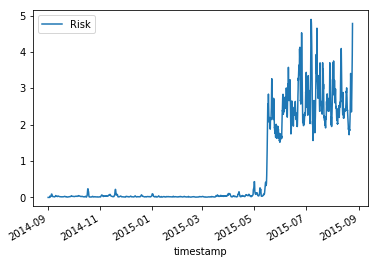

In [25]:
#Plot the risk predictions
prediction.set_index(pd.to_datetime(df['timestamp']), inplace=True)
prediction.plot()

## Find out which machine learning model did Darwin use:

In [26]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

AutoEncoderNet(
  (encoder): layer 1: Linear(in_features=45, out_features=11, bias=True, dropout=0.50, activation=relu)
  layer 2: Linear(in_features=11, out_features=45, bias=True, dropout=0.50, activation=identity)
)
